# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing\Prediction PFS\RNA+Clinic joined\Clinical_data_and_RNA_15_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,21.08036,21.39991,22.39503,31.44953,21.4144,21.24656,30.26124,29.60417,21.9744,21.12857
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,21.08036,21.39991,22.39503,33.02746,21.4144,21.24656,29.12730,29.61188,21.9744,21.12857
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,21.08036,21.39991,22.39503,33.75531,21.4144,21.24656,27.22907,31.90343,21.9744,21.12857
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,21.08036,21.39991,29.70759,33.50304,21.4144,21.24656,22.83731,30.35424,21.9744,21.12857
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,21.08036,21.39991,22.39503,33.18274,21.4144,21.24656,22.83731,31.60946,21.9744,21.12857


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
   

data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,1:42] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Number of patients: ',len(Y))

      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0    62.0   0.0   0.0                        2.0   
1    62.0   0.0   0.0                        2.0   
2    62.0   0.0   0.0                        1.0   
3    62.0   0.0   0.0                        3.0   
4    62.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
176  62.0   0.0   0.0                        1.0   
177  62.0   0.0   0.0                        1.0   
178  62.0   0.0   0.0                        1.0   
179  62.0   0.0   0.0                        1.0   
180  62.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                707.0             
1                                                707.0             
2                                                707.0             
3                                                707.0             
4                                  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       n_estimators=20, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5758620689655173


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7847222222222222
Final accuracy on the testing dataset: 0.43243243243243246


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[58  3  4]
 [10 13  5]
 [ 9  0 42]]
Input data:  [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]
Prediction:        [0 2 2 1 1 0 0 0 0 0 0 2 1 0 2 0 2 0 0 0 2 1 2 0 2 2 0 1 0 0 1 0 0 2 0 0 2
 2 0 2 2 0 0 1 0 0 0 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 2 0 2 0 0 0 2 2 1 0 0 0 2 0 2 0 1 0 0 0 2 2 2 0 1 2 0 2 0 0 0 0 1 0 2 0
 0 0 2 2 0 0 0 0 2 2 0 0 0 0 2 0 0 1 2 0 1 2 2 0 2 2 0 2 0 2 2 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82        65
           1       0.81      0.46      0.59        28
           2       0.82      0.82      0.82        51

    accuracy                           0.78       144
   macro avg       0.80      0.73      0.74       144
weighted avg       0.79      0.78      0.78       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[13  1  6]
 [ 1  0  2]
 [ 9  2  3]]
Input data:  [1 0 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 2 0 0 2 0 0 2 2 2]
Prediction:        [0 2 0 0 1 2 0 0 1 0 2 2 0 0 0 2 0 0 2 2 0 0 2 0 1 0 0 2 0 0 0 2 0 0 2 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.00      0.00      0.00         3
           2       0.27      0.21      0.24        14

    accuracy                           0.43        37
   macro avg       0.28      0.29      0.28        37
weighted avg       0.41      0.43      0.42        37



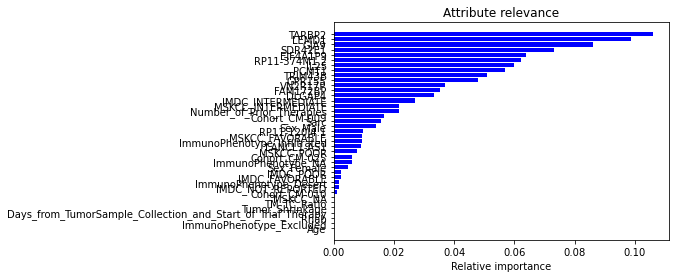

Age = 0.0
Sarc = 0.015860317750359548
Rhab = 0.0
Number_of_Prior_Therapies = 0.02162046111228879
Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy = 0.0
Tumor_Shrinkage = 0.0
TM_TC_Ratio = 0.0
Cohort_CM-009 = 0.01685148782231982
Cohort_CM-010 = 0.0012259090080085008
Cohort_CM-025 = 0.0061633943496357
Sex_Female = 0.00481536586048327
Sex_Male = 0.014033711903802407
MSKCC_FAVORABLE = 0.009521551930220952
MSKCC_INTERMEDIATE = 0.02181630053187215
MSKCC_NA = 0.0
MSKCC_POOR = 0.007888724647167977
IMDC_FAVORABLE = 0.002530698696877046
IMDC_INTERMEDIATE = 0.027121811463237847
IMDC_NOT_REPORTED = 0.001606927807077584
IMDC_POOR = 0.002555822119945257
ImmunoPhenotype_Desert = 0.0016219476039502963
ImmunoPhenotype_Excluded = 0.0
ImmunoPhenotype_Infiltrated = 0.009268695699286898
ImmunoPhenotype_NA = 0.005919165563231938
DLGAP4 = 0.033446121160391855
EIF4A1P9 = 0.06395893315519294
FAM172BP = 0.03514682821722289
GJA9 = 0.08622152825844091
GPR155 = 0.04802286364846301
IL25 = 0.0597420144262

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.